In [125]:
%matplotlib inline
import pymc3 as pm
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])

#### Code 3.1

$$Pr(vampire|positive) = \frac{Pr(positive|vampire) Pr(vampire)} {Pr(positive)}$$

$$Pr(positive) = Pr(positive|vampire) Pr(vampire) + Pr(positive|mortal) 1 − Pr(vampire)$$

In [2]:
PrPV = 0.95
PrPM = 0.01
PrV = 0.001
PrP = PrPV * PrV + PrPM * (1 - PrV)
PrVP = PrPV * PrV / PrP
PrVP

0.08683729433272395

#### Code 3.2 - 3.5

We are goint to use the same function we use on chapter 2 (code 2.3)

In [3]:
def posterior_grid_approx(grid_points=100, success=6, tosses=9):
    """
    """
    # define grid
    p_grid = np.linspace(0, 1, grid_points)

    # define prior
    prior = np.repeat(5, grid_points)  # uniform
    #prior = (p_grid >= 0.5).astype(int)  # truncated
    #prior = np.exp(- 5 * abs(p_grid - 0.5))  # double exp

    # compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(success, tosses, p_grid)

    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    # standardize the posterior, so it sums to 1
    posterior = unstd_posterior / unstd_posterior.sum()
    return p_grid, posterior

In [4]:
p_grid, posterior = posterior_grid_approx(grid_points=100, 
                                          success=6, tosses=9)
samples = np.random.choice(p_grid, p=posterior, 
                           size=int(1e4), replace=True)

np.random.choice pulls values out of the vector here p_grid
posterior provides the relative plasuability/frequency of values


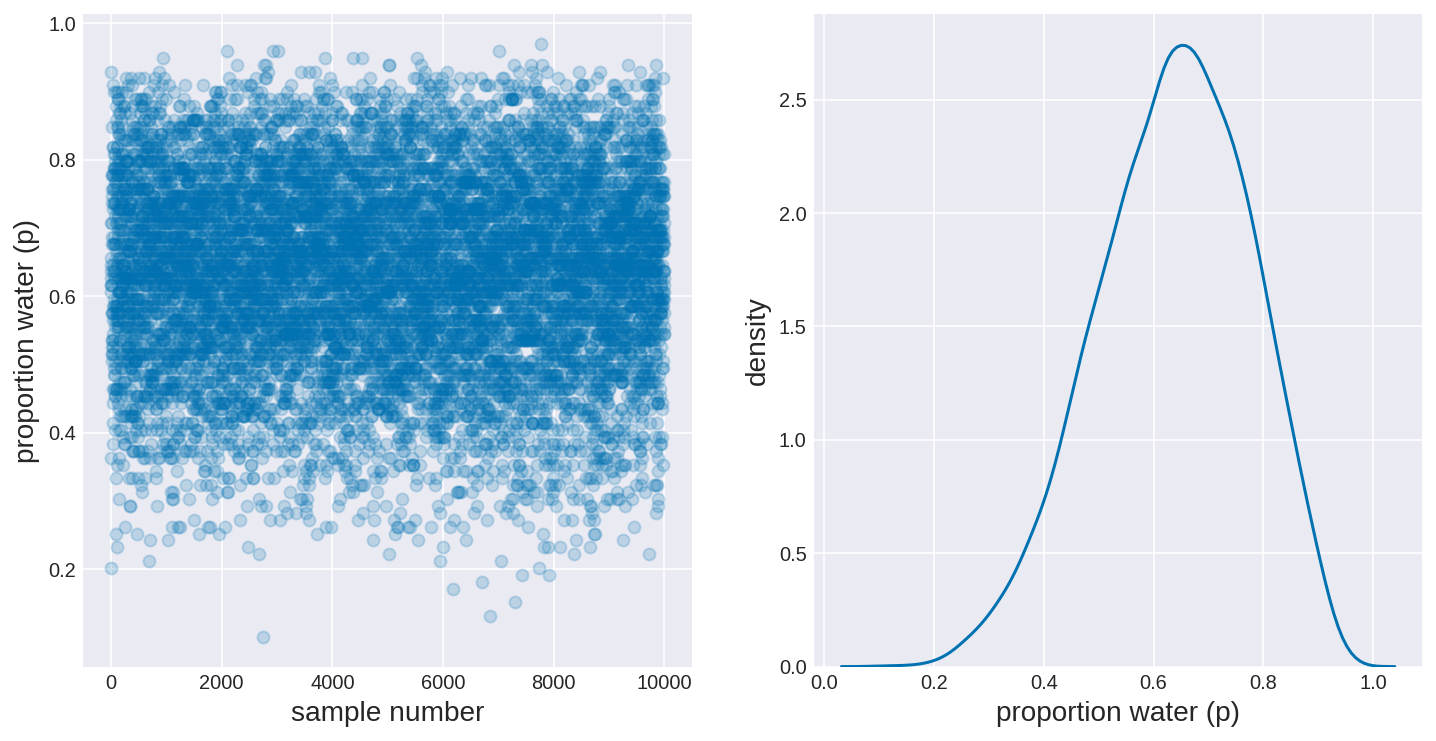

In [5]:
_, (ax0, ax1) = plt.subplots(1,2, figsize=(12,6))
ax0.plot(samples, 'o', alpha=0.2)
ax0.set_xlabel('sample number', fontsize=14)
ax0.set_ylabel('proportion water (p)', fontsize=14)
sns.kdeplot(samples, ax=ax1)
ax1.set_xlabel('proportion water (p)', fontsize=14)
ax1.set_ylabel('density', fontsize=14);

#### Code 3.6

In [6]:
sum(posterior[ p_grid < 0.5 ])

0.17183313110747478

#### Code 3.7

In [7]:
sum( samples < 0.5 ) / 1e4

0.1742

#### Code 3.8

In [8]:
sum((samples > 0.5) & (samples < 0.75)) / 1e4

array([False, False,  True, ..., False, False, False])

#### Code 3.9

In [9]:
np.percentile(samples, 80)

0.7575757575757577

#### Code 3.10

In [10]:
np.percentile(samples, [10, 90])



array([0.44444444, 0.81818182])

#### Code 3.11

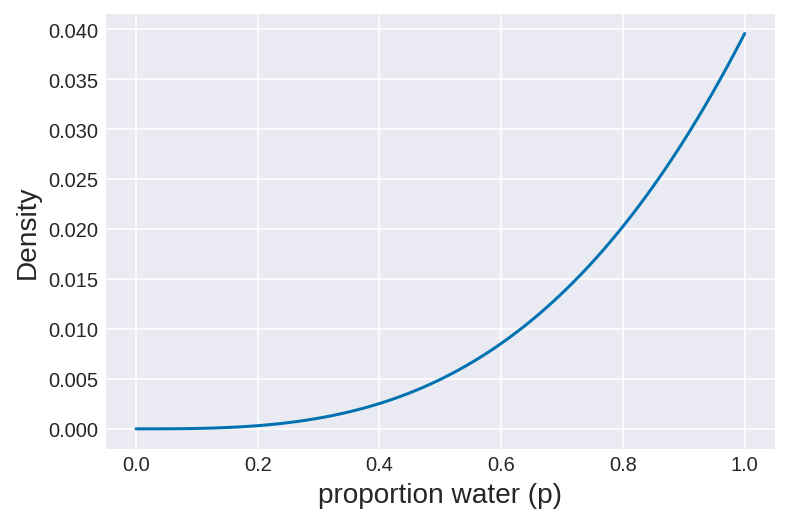

In [11]:
p_grid, posterior = posterior_grid_approx(success=3, tosses=3)
plt.plot(p_grid, posterior)
plt.xlabel('proportion water (p)', fontsize=14)
plt.ylabel('Density', fontsize=14);

#### Code 3.12

In [43]:
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)
np.percentile(samples, [25, 75])


array([0.71717172, 0.93939394])

#### Code 3.13

In [13]:
pm.hpd(samples, alpha=0.5)
# highest posterior density interval

array([0.84848485, 1.        ])

#### Code 3.14

In [14]:
p_grid[posterior == max(posterior)]
# selecting parameter value from p grid that corresponds
# (with the same index) to the maximum posterior


array([1.])

#### Code 3.15

In [15]:
stats.mode(samples)[0]

array([1.])

#### Code 3.16

In [16]:
np.mean(samples), np.median(samples)

(0.802660606060606, 0.8484848484848485)

#### Code 3.17

In [17]:
sum(posterior * abs(0.5 - p_grid))
# weighted L1 distance from guess .5, lets do this for multiple guesses
# and then find the lowest one....minimization


0.31626874808692995

#### Code 3.18 and 3.19

parameter value that minimizes:
 [0.84848485]
median:
 0.84848


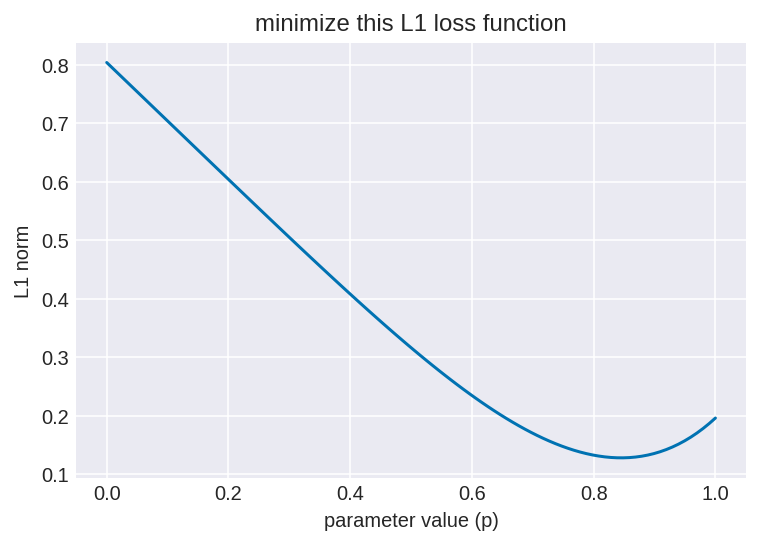

In [18]:
loss = [sum(posterior * abs(p - p_grid)) for p in p_grid]
minimal = p_grid[loss == min(loss)]

plt.plot(p_grid,loss)
plt.title('minimize this L1 loss function')
plt.xlabel('parameter value (p)')
plt.ylabel('L1 norm')
print ('parameter value that minimizes:\n',minimal)
print ('median:\n', np.round(np.median(samples),5))

#### Code 3.20

In [19]:
stats.binom.pmf(range(3), n=2, p=0.7)

array([0.09, 0.42, 0.49])

#### Code 3.21

In [24]:
stats.binom.rvs(n=2, p=0.7, size=1)
# simulate one experiment from a binomial distribution, where you toss n=2, with a
# p=70% water, then reported as how many waters came up out of two. 

array([1])

#### Code 3.22

In [25]:
stats.binom.rvs(n=2, p=0.7, size=10)


array([2, 1, 1, 0, 2, 2, 2, 1, 2, 2])

#### Code 3.23

In [29]:
dummy_w = stats.binom.rvs(n=2, p=0.7, size=int(1e5))
[(dummy_w == i).mean() for i in range(3)]

[0.08805, 0.42107, 0.49088]

#### Code 3.24, 3.25 and 3.26

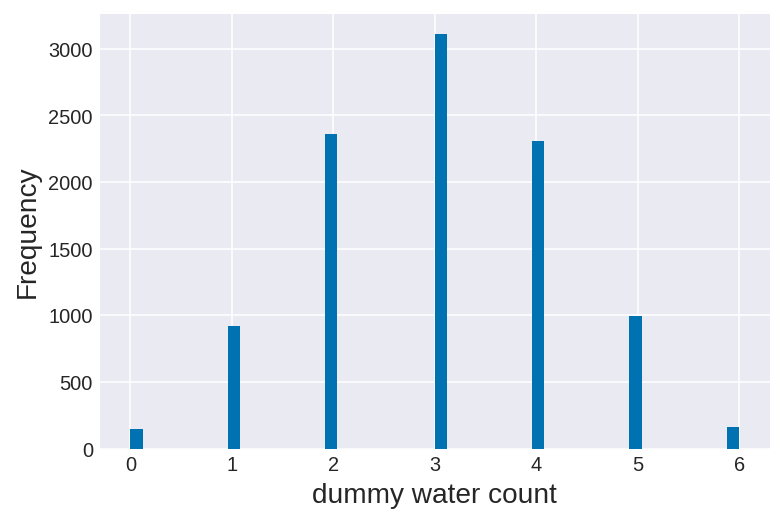

In [49]:
dummy_w = stats.binom.rvs(n=9, p=0.7, size=int(1e5))
#dummy_w = stats.binom.rvs(n=6, p=0.5, size=int(1e4))
#dummy_w = stats.binom.rvs(n=9, p=samples)
plt.hist(dummy_w, bins=50)
plt.xlabel('dummy water count', fontsize=14)
plt.ylabel('Frequency', fontsize=14);

#### Code 3.27

In [62]:
p_grid, posterior = posterior_grid_approx(grid_points=100, success=6, tosses=9)
np.random.seed(100)
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)
#This generates 10,000 ( 1e4 ) simulated predictions of 9 globe tosses ( size=9 ),
#0.6. The predictions are stored as counts of water, so the theoretical minimum is zero and

samples

array([0.65656566, 0.55555556, 0.61616162, ..., 0.5959596 , 0.36363636,
       0.44444444])

#### Code 3.25

Text(0.5, 0, 'frequency of water in each experiment of nine tosses')

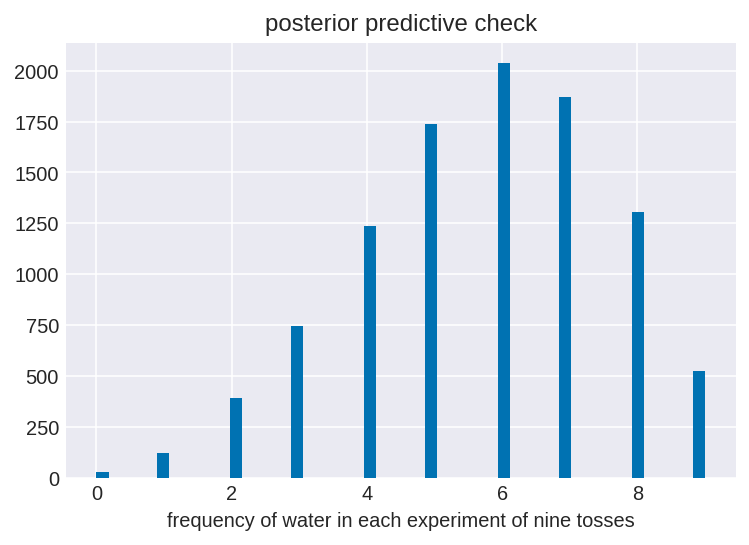

In [82]:
dummy_w = stats.binom.rvs(n=9, p=0.7, size=int(1e5))
dummy = np.zeros(samples.size)
for i in range(samples.size):
    dummy[i] = stats.binom.rvs(n=9, p=samples[i], size=1)#int(1e5)))
    
plt.hist(dummy, bins = 50)
plt.title('posterior predictive check')
plt.xlabel('frequency of water in each experiment of nine tosses')


#### new code alluded to



(array([  25.,    0.,    0.,  117.,    0.,    0.,  376.,    0.,    0.,
           0.,  690.,    0.,    0., 1086.,    0.,    0., 1449.,    0.,
           0.,    0., 1613.,    0.,    0., 1500.,    0.,    0., 1122.,
           0.,    0.,  486.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. , 3.3, 3.6,
        3.9, 4.2, 4.5, 4.8, 5.1, 5.4, 5.7, 6. , 6.3, 6.6, 6.9, 7.2, 7.5,
        7.8, 8.1, 8.4, 8.7, 9. ]),
 <a list of 30 Patch objects>)

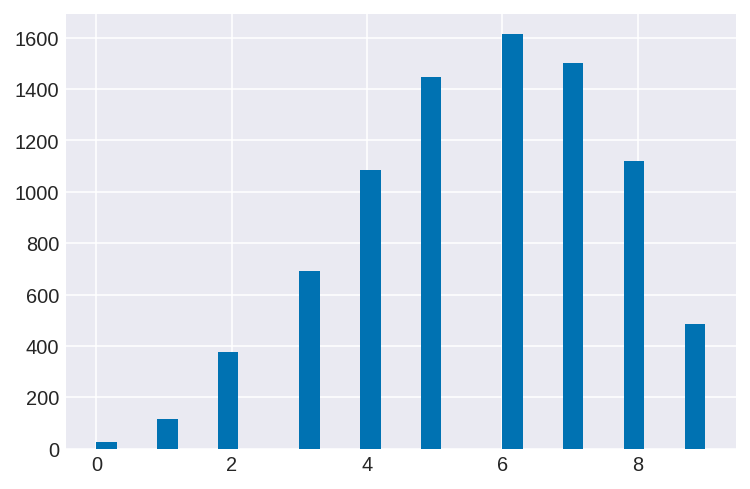

In [96]:
def find_runs(x):
    """Find runs of consecutive items in an array."""

    # ensure array
    x = np.asanyarray(x)
    if x.ndim != 1:
        raise ValueError('only 1D array supported')
    n = x.shape[0]
    
    # handle empty array
    if n == 0:
        return np.array([]), np.array([]), np.array([])

    else:
        # find run starts
        loc_run_start = np.empty(n, dtype=bool)
        loc_run_start[0] = True
        np.not_equal(x[:-1], x[1:], out=loc_run_start[1:])
        run_starts = np.nonzero(loc_run_start)[0]

        # find run values
        run_values = x[loc_run_start]

        # find run lengths
        run_lengths = np.diff(np.append(run_starts, n))

    return run_values, run_starts, run_lengths

run_values, run_starts, run_lengths = find_runs(dummy)


plt.hist(run_values, bins=30)

array([5., 6., 4., ..., 7., 0., 2.])

In [16]:
import sys, IPython, scipy, matplotlib, platform
print("This notebook was createad on a computer %s running %s and using:\nPython %s\nIPython %s\nPyMC3 %s\nNumPy %s\nSciPy %s\nMatplotlib %s\nSeaborn %s\n" % (platform.machine(), ' '.join(platform.linux_distribution()[:2]), sys.version[:5], IPython.__version__, pm.__version__, np.__version__, scipy.__version__, matplotlib.__version__, sns.__version__))

This notebook was createad on a computer x86_64 running debian buster/sid and using:
Python 3.6.8
IPython 6.4.0
PyMC3 3.6
NumPy 1.14.3
SciPy 1.1.0
Matplotlib 3.0.2
Seaborn 0.8.1



### Problems:
##### Easy:

In [109]:
p_grid, posterior = posterior_grid_approx(grid_points=int(1e5), success=6, tosses=9)
np.random.seed(100)
samples = np.random.choice(p_grid, p=posterior, size=int(1e5), replace=True)

In [110]:
sum(samples<.2)/1e5, sum(posterior[p_grid<.2])
# add posterior probability density/mass? below p value of .2, 
# ~ sampling from posterior then adding all samples less then a certain amount


(0.121, 0.12086859672851435)

In [111]:
sum(samples>.8)/1e5, sum(posterior[p_grid>.8])

(0.121, 0.12086859672851435)

In [117]:
sum((samples>.2) & (samples<.8))/1e5, sum(posterior[(p_grid<.8) & (p_grid>.2)])

(0.87828, 0.8782671274474264)

In [124]:
np.percentile(samples, 20), np.percentile(samples, [80,100])

(0.5162751627516275, array([0.76086761, 0.98199982]))

In [141]:
pm.hpd(samples, alpha=.33)
# how to do nomral Percentile Interval?

array([0.39393939, 0.62626263])

### Problems: 
###### Medium:

#### 1

Text(0.5, 0, 'parameter of water value')

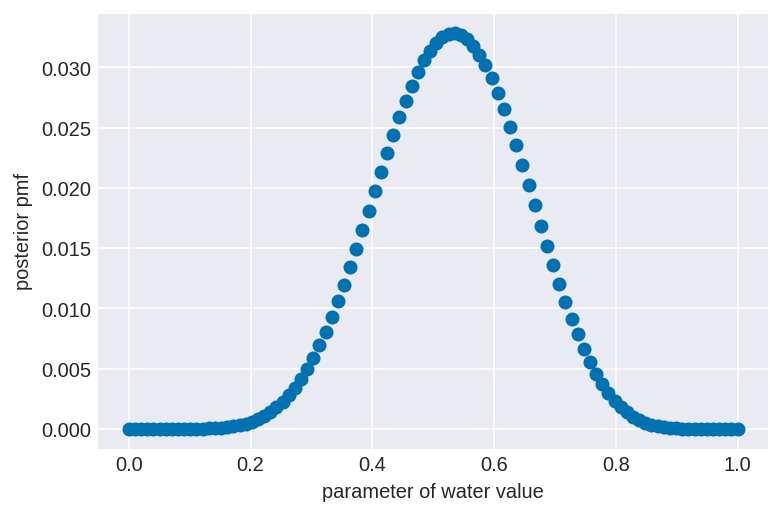

In [133]:

p_grid, posterior = posterior_grid_approx(grid_points=100, success=8, tosses=15)

plt.plot(p_grid, posterior, 'o')
plt.ylabel('posterior pmf')
plt.xlabel('parameter of water value')

##### 2

In [140]:
# sample from above posterior
# pull from p_grid with a relative prob of posteior
# you get a bag full of parameter water values, with
# relative frequencies appropriate to this posterior
# assuming size is large enough
samples = np.random.choice(p_grid, p=posterior, size=int(1e5), replace=True)

pm.hpd(samples, alpha=.1)

array([0.34343434, 0.72727273])

#### 3
posterior predictive check


Text(0.5, 0, 'frequency of water in each experiment of nine tosses')

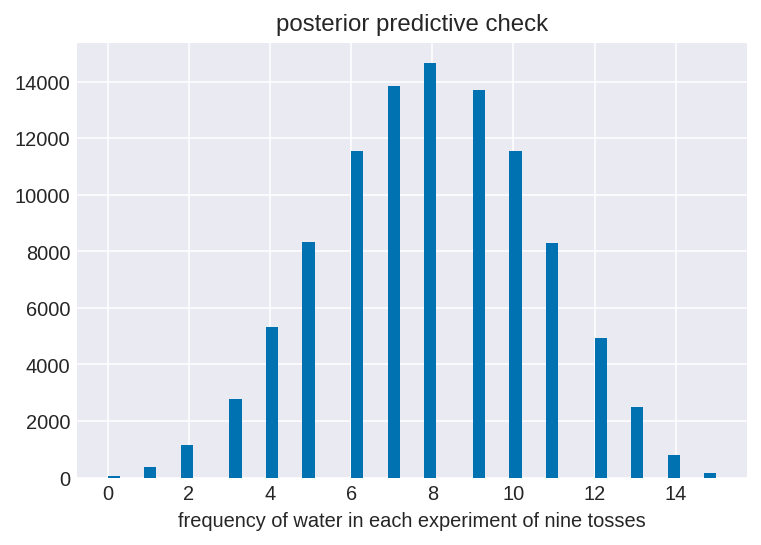

In [142]:
dummy = np.zeros(samples.size)
for i in range(samples.size):
    dummy[i] = stats.binom.rvs(n=15, p=samples[i], size=1)#int(1e5)))
    
plt.hist(dummy, bins = 50)
plt.title('posterior predictive check')
plt.xlabel('frequency of water in each experiment of nine tosses')


##### 4
posterior predictive using 8/15 posterior, what is the probability of seeing 6/9

prob of seeing 6 waters in 9 tosses:, 
 0.17723


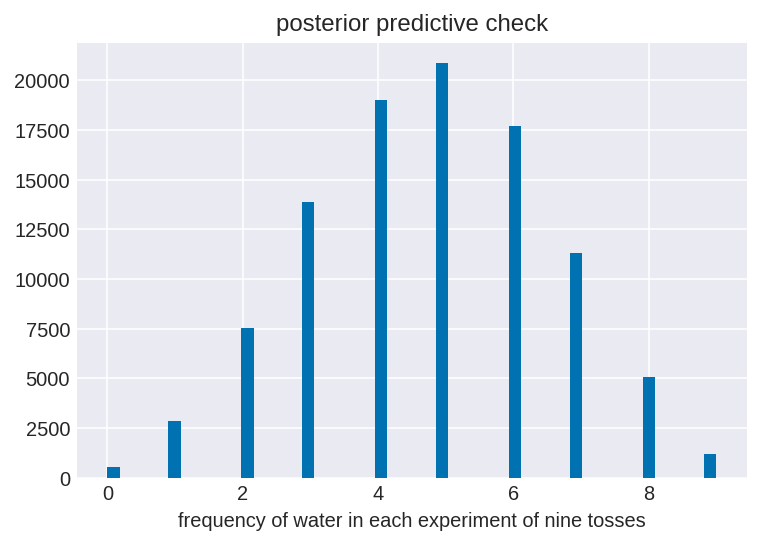

In [152]:
dummy = np.zeros(samples.size)
for i in range(samples.size):
    dummy[i] = stats.binom.rvs(n=9, p=samples[i], size=1)#int(1e5)))
    
plt.hist(dummy, bins = 50)
plt.title('posterior predictive check')
plt.xlabel('frequency of water in each experiment of nine tosses')

print ('prob of seeing 6 waters in 9 tosses:, \n', (dummy==6).mean())

#### 5

restart from 1 but using a different prior:
new prior zero below p = 0.5 and a constant above p = 0.5.


In [153]:
def posterior_grid_approx(grid_points=100, success=6, tosses=9):
    """
    """
    # define grid
    p_grid = np.linspace(0, 1, grid_points)

    # define prior
    #prior = np.repeat(5, grid_points)  # uniform
    prior = (p_grid >= 0.5).astype(int)  # truncated
    #prior = np.exp(- 5 * abs(p_grid - 0.5))  # double exp

    # compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(success, tosses, p_grid)

    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    # standardize the posterior, so it sums to 1
    posterior = unstd_posterior / unstd_posterior.sum()
    return p_grid, posterior

Text(0.5, 1.0, 'grid app posteior with truncated prior')

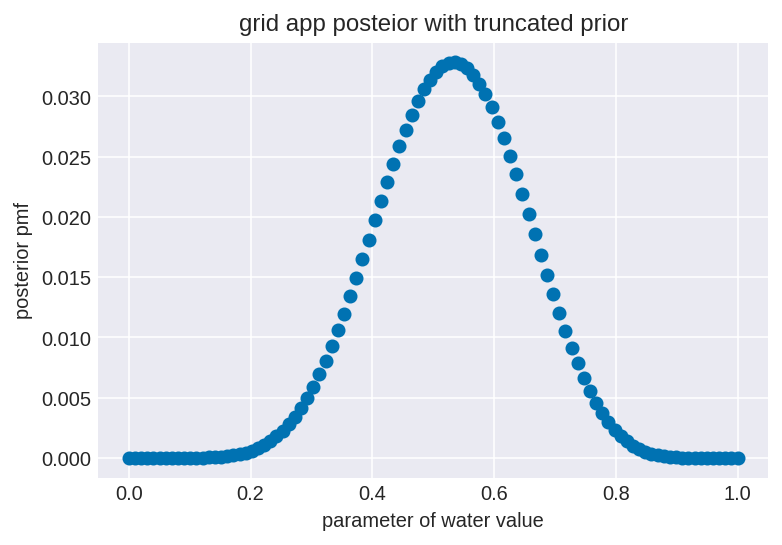

In [172]:
p_grid, posterior = posterior_grid_approx(grid_points=100, success=8, tosses=15)

plt.plot(p_grid, posterior, 'o')
plt.ylabel('posterior pmf')
plt.xlabel('parameter of water value')
plt.title('grid app posteior with truncated prior')

In [155]:
# sample from above posterior
# pull from p_grid with a relative prob of posteior
# you get a bag full of parameter water values, with
# relative frequencies appropriate to this posterior
# assuming size is large enough
samples = np.random.choice(p_grid, p=posterior, size=int(1e5), replace=True)

pm.hpd(samples, alpha=.1)

array([0.50505051, 0.70707071])

Text(0.5, 0, 'frequency of water in each experiment of nine tosses')

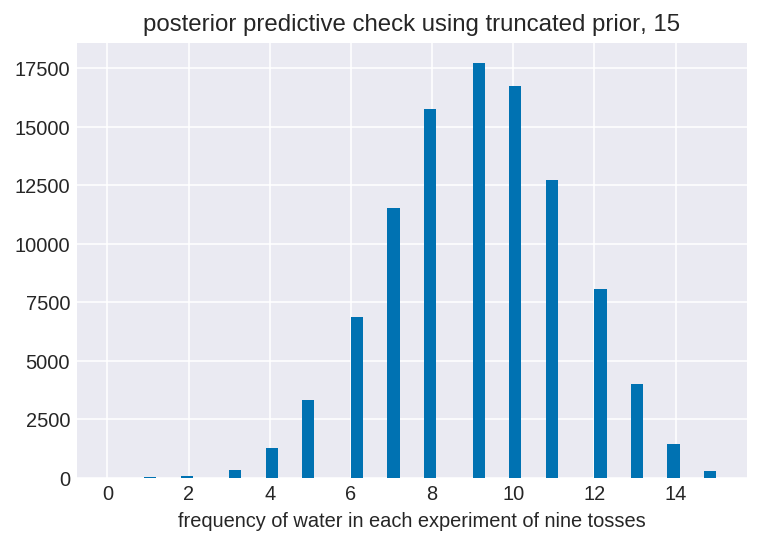

In [160]:
dummy = np.zeros(samples.size)
for i in range(samples.size):
    dummy[i] = stats.binom.rvs(n=15, p=samples[i], size=1)#int(1e5)))
    
plt.hist(dummy, bins = 50)
plt.title('posterior predictive check using truncated prior, 15')
plt.xlabel('frequency of water in each experiment of nine tosses')


prob of seeing 6 waters in 9 tosses:, 
 0.23397


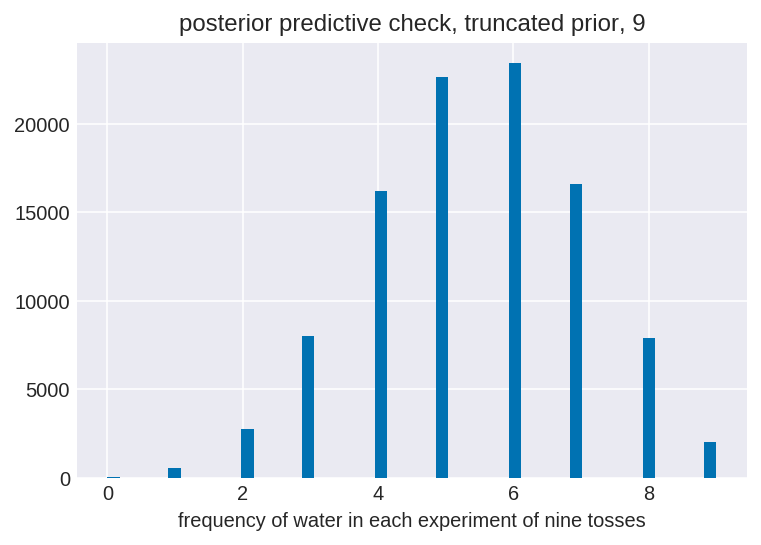

In [161]:

dummy = np.zeros(samples.size)
for i in range(samples.size):
    dummy[i] = stats.binom.rvs(n=9, p=samples[i], size=1)#int(1e5)))
    
plt.hist(dummy, bins = 50)
plt.title('posterior predictive check, truncated prior, 9')
plt.xlabel('frequency of water in each experiment of nine tosses')

print ('prob of seeing 6 waters in 9 tosses:, \n', (dummy==6).mean())

You can see the probability of seeing 6 waters in 9 tosses went up subtsantially from .17 to .23. This is expected as you removed any parameter values below .5 in your prior and therefore as well in your posterior. 

##### Hard

###### 1

In [162]:
birth1 = np.array([1,0,0,0,1,1,0,1,0,1,0,0,1,1,0,1,1,0,0,0,1,0,0,0,1,0,
0,0,0,1,1,1,0,1,0,1,1,1,0,1,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,
1,1,0,1,0,0,1,0,0,0,1,0,0,1,1,1,1,0,1,0,1,1,1,1,1,0,0,1,0,1,1,0,
1,0,1,1,1,0,1,1,1,1])
birth2 = np.array([0,1,0,1,0,1,1,1,0,0,1,1,1,1,1,0,0,1,1,1,0,0,1,1,1,0,
1,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,
1,1,1,0,1,1,0,1,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,
0,0,0,1,1,1,0,0,0,0])

In [168]:
sum(birth1), sum(birth2), birth1.size, birth2.size

(51, 60, 100, 100)

In [165]:
def posterior_grid_approx(grid_points=100, success=6, tosses=9):
    """
    """
    # define grid
    p_grid = np.linspace(0, 1, grid_points)

    # define prior
    prior = np.repeat(1, grid_points)  # uniform
    #prior = (p_grid >= 0.5).astype(int)  # truncated
    #prior = np.exp(- 5 * abs(p_grid - 0.5))  # double exp

    # compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(success, tosses, p_grid)

    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    # standardize the posterior, so it sums to 1
    posterior = unstd_posterior / unstd_posterior.sum()
    return p_grid, posterior

max posterior p value: 
 0.556


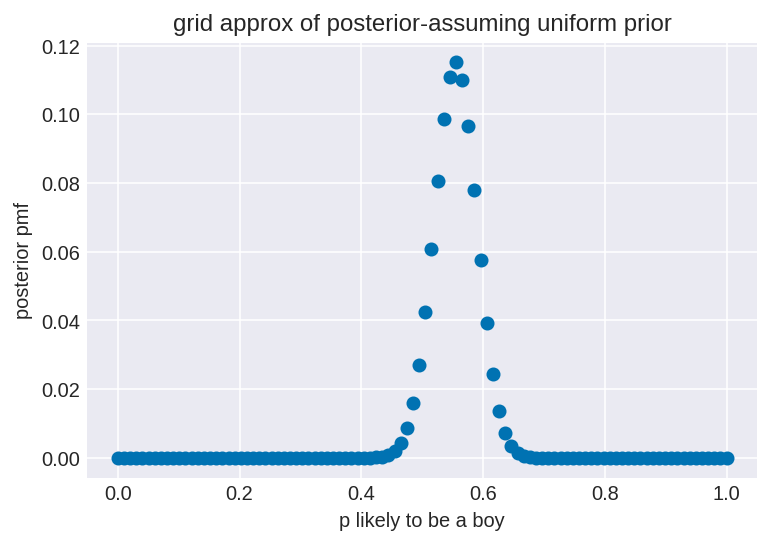

In [179]:
p_grid, posterior = posterior_grid_approx(100, success=sum(birth1)+sum(birth2),
                                         tosses = birth1.size + birth2.size)

plt.plot(p_grid, posterior, 'o')
plt.ylabel('posterior pmf')
plt.xlabel('p likely to be a boy')
plt.title('grid approx of posterior-assuming uniform prior')

print ('max posterior p value: \n', np.round(p_grid[posterior == posterior.max()][0],3))

#### 2

In [182]:
samples = np.random.choice(p_grid, p=posterior, size=int(1e5), replace=True)
#50,89,97 hpd
print ('HPD 50%: \n', pm.hpd(samples, alpha=.5))
print ('\nHPD 89%: \n', pm.hpd(samples, alpha=.11))
print ('\nHPD 97%: \n', pm.hpd(samples, alpha=.03))

HPD 50%: 
 [0.54545455 0.58585859]

HPD 89%: 
 [0.50505051 0.60606061]

HPD 97%: 
 [0.48484848 0.62626263]


##### 3

1e5 replicates of 200 births, each number corresponding to number of boys out of 200

In [190]:
dummy = np.zeros(samples.size)
for i in range(samples.size):
    dummy[i] = stats.binom.rvs(n=200, p=samples[i], size=1)
# size defines number of rvs


(array([4.0000e+00, 1.5000e+01, 6.8000e+01, 1.3100e+02, 5.0300e+02,
        8.2200e+02, 2.4540e+03, 3.3760e+03, 5.1230e+03, 1.0010e+04,
        9.8920e+03, 1.5338e+04, 1.2116e+04, 1.4589e+04, 8.7700e+03,
        8.3730e+03, 3.8060e+03, 2.3740e+03, 1.4960e+03, 4.6800e+02,
        2.0000e+02, 5.4000e+01, 1.2000e+01, 5.0000e+00, 1.0000e+00]),
 array([ 69.  ,  72.44,  75.88,  79.32,  82.76,  86.2 ,  89.64,  93.08,
         96.52,  99.96, 103.4 , 106.84, 110.28, 113.72, 117.16, 120.6 ,
        124.04, 127.48, 130.92, 134.36, 137.8 , 141.24, 144.68, 148.12,
        151.56, 155.  ]),
 <a list of 25 Patch objects>)

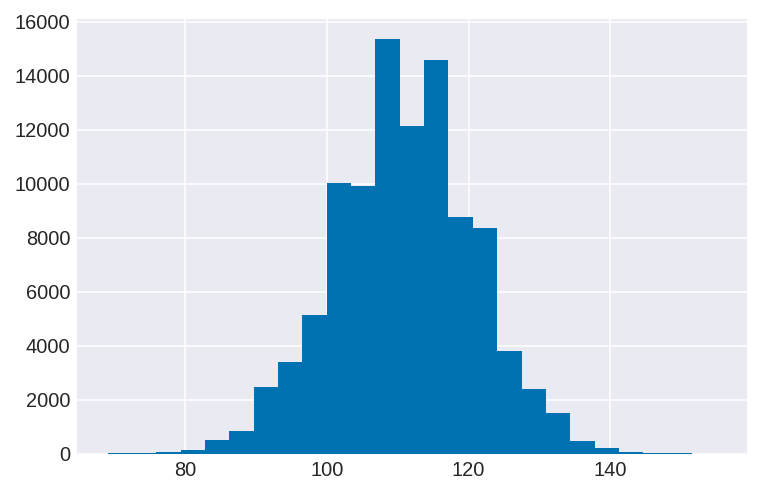

In [195]:
plt.hist(dummy, bins=25)

#### 4

only from birth1 data set now: 10,000 counts of boys from 100 simulated first births

max posterior p value: 
 0.505


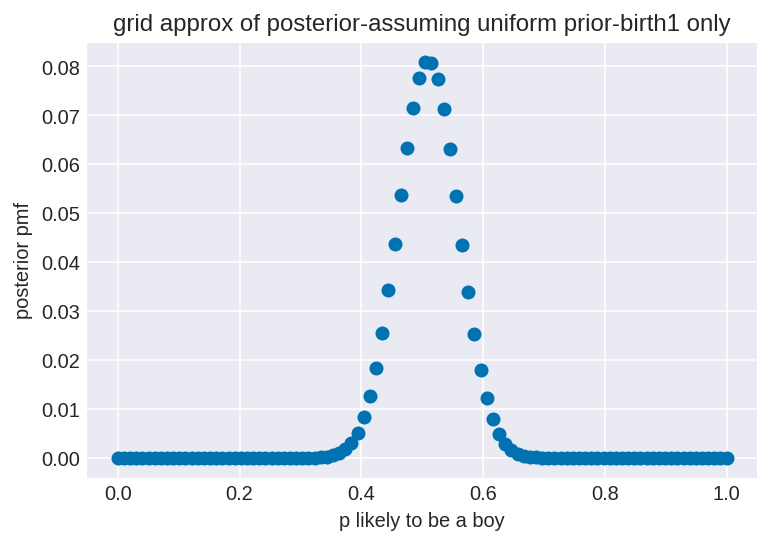

In [197]:
p_grid, posterior = posterior_grid_approx(100, success=sum(birth1),
                                         tosses = birth1.size)

plt.plot(p_grid, posterior, 'o')
plt.ylabel('posterior pmf')
plt.xlabel('p likely to be a boy')
plt.title('grid approx of posterior-assuming uniform prior-birth1 only')

print ('max posterior p value: \n', np.round(p_grid[posterior == posterior.max()][0],3))

(array([2.0000e+00, 2.0000e+00, 2.0000e+01, 6.3000e+01, 2.6100e+02,
        5.6500e+02, 1.2270e+03, 2.4840e+03, 5.5900e+03, 7.1750e+03,
        9.6000e+03, 1.1843e+04, 1.6100e+04, 1.2471e+04, 1.0873e+04,
        8.3750e+03, 7.0480e+03, 3.1800e+03, 1.7490e+03, 8.0400e+02,
        4.1900e+02, 1.0700e+02, 3.0000e+01, 7.0000e+00, 5.0000e+00]),
 array([ 48.  ,  52.24,  56.48,  60.72,  64.96,  69.2 ,  73.44,  77.68,
         81.92,  86.16,  90.4 ,  94.64,  98.88, 103.12, 107.36, 111.6 ,
        115.84, 120.08, 124.32, 128.56, 132.8 , 137.04, 141.28, 145.52,
        149.76, 154.  ]),
 <a list of 25 Patch objects>)

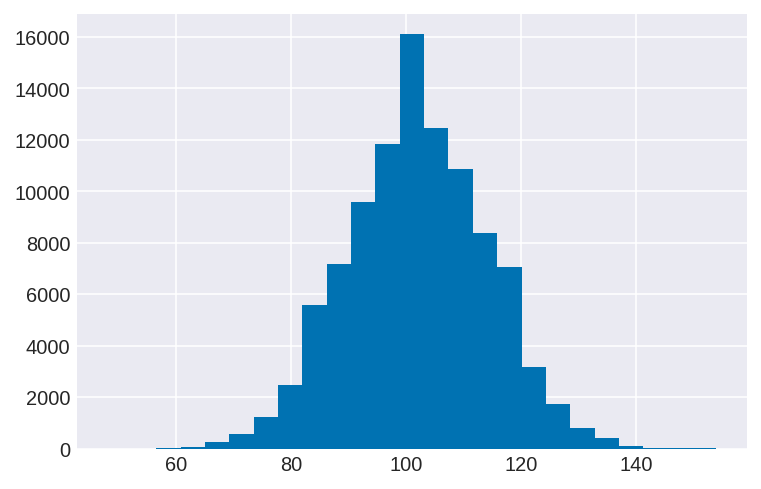

In [200]:
samples = np.random.choice(p_grid, p=posterior, size=int(1e5), replace=True)
# simulate dummy data
dummy = np.zeros(samples.size)
for i in range(samples.size):
    dummy[i] = stats.binom.rvs(n=200, p=samples[i], size=1)

plt.hist(dummy, bins=25)

111 boy births is still well within this models reasonableness. However, you can clearly see there is a different emperical mean with the second birth. Probably just by chance. 

##### 5
The model assumes that sex of first and second births are independent. To check this assump
tion, focus now on second births that followed female first borns. Compare 10,000 simulated counts
of boys to only those second births that followed girls. To do this correctly, you need to count the
number of first borns who were girls and simulate that many births, 10,000 times. Compare the
counts of boys in your simulations to the actual observed count of boys following girls. How does the
model look in this light? Any guesses what is going on in these data?

Below is not correct. 

In [213]:
print ('# of first born girls in birth1 df: \n',sum(birth1==0))
print ('...out of total of: \n', birth1.size)
print ('\nporportion of boys after girl was first born: \n',
       np.round(sum(birth2[birth1==0])/birth2[birth1==0].size,2))



# of first born girls in birth1 df: 
 49
...out of total of: 
 100

porportion of boys after girl was first born: 
 0.8


max posterior p value: 
 0.495


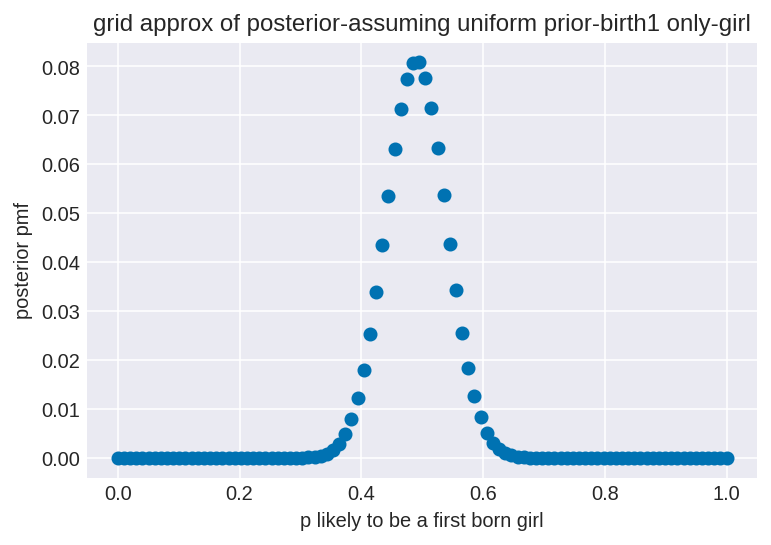

In [214]:
p_grid, posterior = posterior_grid_approx(100, success=sum(birth1==0),
                                         tosses = birth1.size)

plt.plot(p_grid, posterior, 'o')
plt.ylabel('posterior pmf')
plt.xlabel('p likely to be a first born girl')
plt.title('grid approx of posterior-assuming uniform prior-birth1 only-girl')

print ('max posterior p value: \n', np.round(p_grid[posterior == posterior.max()][0],3))

(array([2.0000e+00, 3.0000e+00, 5.0000e+01, 6.1000e+01, 4.4400e+02,
        5.9000e+02, 2.5610e+03, 2.4470e+03, 8.1750e+03, 6.0330e+03,
        1.5686e+04, 9.0930e+03, 1.8354e+04, 8.5020e+03, 1.3476e+04,
        4.7520e+03, 5.9530e+03, 1.6380e+03, 1.5910e+03, 3.1400e+02,
        2.1800e+02, 3.2000e+01, 2.2000e+01, 2.0000e+00, 1.0000e+00]),
 array([ 6.  ,  7.48,  8.96, 10.44, 11.92, 13.4 , 14.88, 16.36, 17.84,
        19.32, 20.8 , 22.28, 23.76, 25.24, 26.72, 28.2 , 29.68, 31.16,
        32.64, 34.12, 35.6 , 37.08, 38.56, 40.04, 41.52, 43.  ]),
 <a list of 25 Patch objects>)

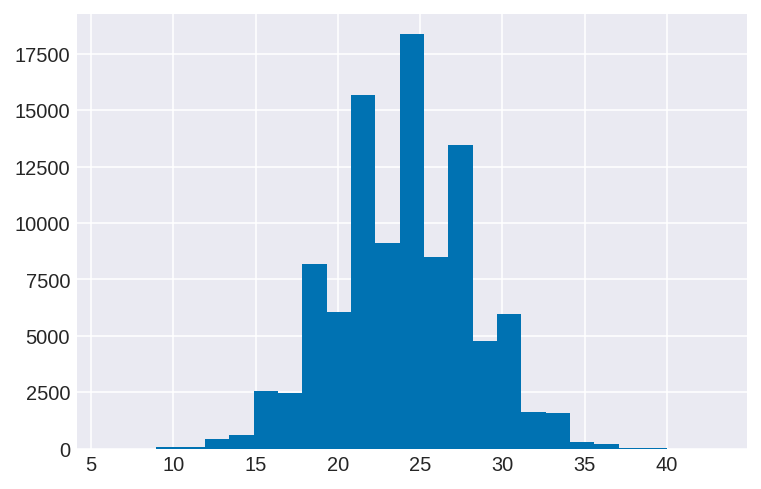

In [216]:
samples = np.random.choice(p_grid, p=posterior, size=int(1e5), replace=True)
# simulate dummy data
dummy = np.zeros(samples.size)
for i in range(samples.size):
    dummy[i] = stats.binom.rvs(n=49, p=samples[i], size=1)

plt.hist(dummy, bins=25)